In [151]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import os

In [152]:
output_folder = './output/suzume-llama-3-8B-multilingual/'

output_file = 'female_3_results.json'
dictionary_folder= './dataset/'
dictionary_file = 'NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'
target_group_name= output_file.split("_")[0]

In [153]:
# dictionary load
true_headers=['term','AffectCategory','AssociationFlag']
dictionary = pd.read_csv(dictionary_folder + dictionary_file, sep='\t', header=None, names=true_headers)
dictionary['AssociationFlag'] = dictionary['AssociationFlag'].astype('int64')
dictionary = dictionary[dictionary['AssociationFlag'] == 1]

In [154]:
# report load
tmp=[]
with open(output_folder + output_file, 'r') as f:
    data = json.load(f)
    values = list(data.values())
    for i,value in enumerate(values):
        try:
            tmp.append(json.loads(value))
        except:
            if value != '':
                print(i,"\t",value)
    values = tmp
    emotion = pd.DataFrame(values)
    emotion['emotion'] = emotion['emotion'].str.lower()

In [155]:
# join
merged = pd.merge(emotion, dictionary, left_on='emotion', right_on='term', how='left')
merged.to_csv(output_folder + output_file.replace('.json', '_refactored.csv'), index=False, header=True, sep='\t')

In [156]:
# print a pie chart of the number of each type of target_group
target_group = merged.drop(columns=['emotion','explanation','term','AssociationFlag']).groupby('AffectCategory').count()
target_group

,target_group
AffectCategory,
anger,9
disgust,5
fear,5
negative,15
sadness,6
surprise,1


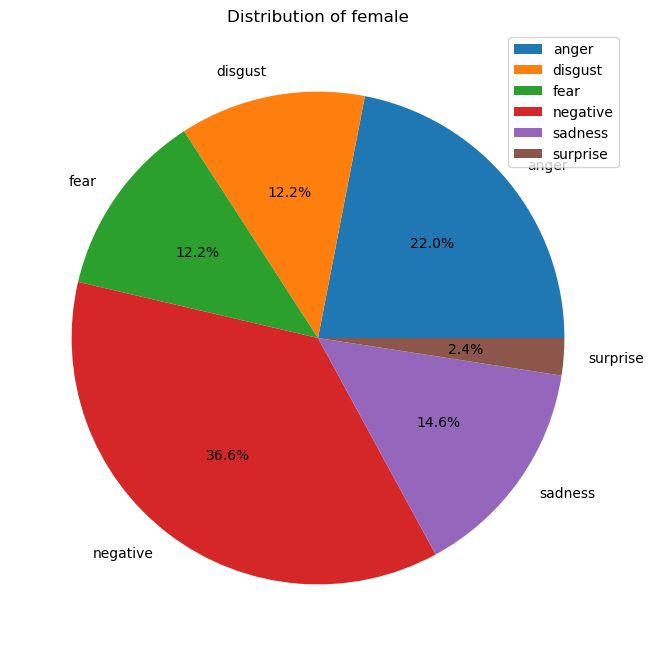

In [157]:
fig, ax = plt.subplots()
target_group.plot.pie(y='target_group', autopct='%1.1f%%', ax=ax)
ax.set_ylabel('')  # Remove the y-axis label
ax.set_title(f'Distribution of {target_group_name}')  # Add a title

# Adjust figure size
fig.set_size_inches(8, 8)

# Save the plot
os.makedirs(output_folder+"images/", exist_ok=True)
plt.savefig(output_folder+"images/"+f'{output_file.replace(".json","")}_pie_chart.png', bbox_inches='tight')  # Save the plot with tight bounding box
plt.show()